# Putting the pieces of kicker data together 
#### Matthew Johnson, August 13, 2018

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import TransformerMixin, BaseEstimator, clone
warnings.filterwarnings('ignore')

kickers09to17 = pd.read_csv('kicker_data_09_17.csv')
weather09to13 = pd.read_csv('weather_data09to13.csv') 
vegas09to17 = pd.read_csv('vegas_odds09to17.csv') # Weeks 6-16

dfs = [kickers09to17, weather09to13, vegas09to17]
dfs[1].drop('Unnamed: 0', axis=1, inplace=True)
dfs[2].drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
mergecodes = []
mergecodes2 = []

for df in dfs:
    print (df.shape)
    mergecodes.append(list(df['mergeCode'].unique()))
    mergecodes2.append(list(df['mergeCode2'].unique()))

In [ ]:
# A - kicker data
# B - weather
# C - vegas odds

A = set(mergecodes[0])
B = set(mergecodes[1])
sd = A.symmetric_difference(B)
intersect1 = A.intersection(B)
print('A:', len(A), 'B:', len(B), 'sym_diff:', len(sd), 'intersect:', len(intersect1))

A = set(mergecodes[0])
C = set(mergecodes[2])
sd = A.symmetric_difference(C)
intersect2 = A.intersection(C)
print('A:', len(A), 'C:', len(C), 'sym_diff:', len(sd), 'intersect:', len(intersect2))

C = set(mergecodes[2])
B = set(mergecodes[1])
sd = C.symmetric_difference(B)
intersect3 = C.intersection(B)
print('C:', len(C), 'B:', len(B), 'sym_diff:', len(sd), 'intersect:', len(intersect3))

intersect_all = intersect1.intersection(C)
print('int_all:', len(intersect_all))

In [69]:
# A - kicker data
# B - weather
# C - vegas odds

A = set(mergecodes2[0])
B = set(mergecodes2[1])
sd = A.symmetric_difference(B)
intersect1 = A.intersection(B)
print('A:', len(A), 'B:', len(B), 'sym_diff:', len(sd), 'intersect:', len(intersect1))

A = set(mergecodes2[0])
C = set(mergecodes2[2])
sd = A.symmetric_difference(C)
intersect2 = A.intersection(C)
print('A:', len(A), 'C:', len(C), 'sym_diff:', len(sd), 'intersect:', len(intersect2))

C = set(mergecodes2[2])
B = set(mergecodes2[1])
sd = C.symmetric_difference(B)
intersect3 = C.intersection(B)
print('C:', len(C), 'B:', len(B), 'sym_diff:', len(sd), 'intersect:', len(intersect3))

intersect_all = intersect1.intersection(C)
print('int_all:', len(intersect_all))

A: 2640 B: 2052 sym_diff: 2032 intersect: 1330
A: 2640 C: 2872 sym_diff: 898 intersect: 2307
C: 2872 B: 2052 sym_diff: 2422 intersect: 1251
int_all: 1214


In [10]:
test_list = []
pred_list = []
rank_list = []

for i in range(0,37):
    test_list.append(ytest[i*20:i*20+20])
    pred_list.append(predictions[20*i:20*(1+i)])
    
    test_rank = pd.DataFrame(test_list[i]).rank()
    pred_rank = pd.DataFrame(pred_list[i]).rank()

    ranks = pd.concat([test_rank.reset_index(drop=True), pred_rank.reset_index(drop=True)], axis=1)
    ranks.columns = ['test_rank', 'pred_rank']
    ranks['pred_rank']=ranks['pred_rank'].astype('int64')
    ranks['residual'] = ranks['test_rank']-ranks['pred_rank']
    rank_list.append(ranks)

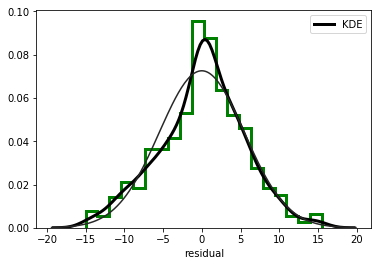

In [12]:
from scipy.stats import norm

rank_df = pd.concat(rank_list)
sns.distplot(rank_df['residual'], bins=20, fit=norm,
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"});

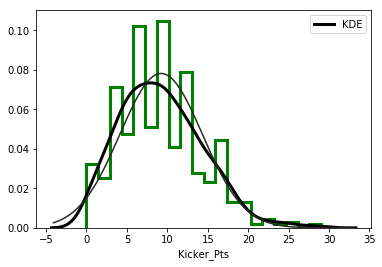

In [13]:
sns.distplot(ytest, bins=20, fit=norm,
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"});

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 2018)
rf2.fit(Xtrain, ytrain);

In [15]:
predictions = rf2.predict(Xtest)
errors = abs(predictions - ytest)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3.31


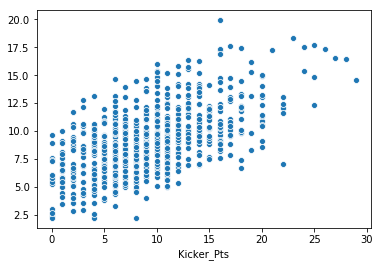

In [16]:
sns.scatterplot(x=ytest, y=predictions)

In [17]:
test_list = []
pred_list = []
rank_list = []

for i in range(0,37):
    test_list.append(ytest[i*20:i*20+20])
    pred_list.append(predictions[20*i:20*(1+i)])
    
    test_rank = pd.DataFrame(test_list[i]).rank()
    pred_rank = pd.DataFrame(pred_list[i]).rank()

    ranks = pd.concat([test_rank.reset_index(drop=True), pred_rank.reset_index(drop=True)], axis=1)
    ranks.columns = ['test_rank', 'pred_rank']
    ranks['pred_rank']=ranks['pred_rank'].astype('int64')
    ranks['residual'] = ranks['test_rank']-ranks['pred_rank']
    rank_list.append(ranks)
    
rank_df = pd.concat(rank_list)

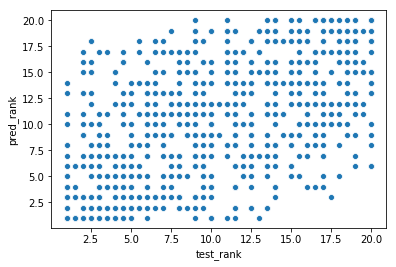

In [18]:
sns.scatterplot(x='test_rank', y='pred_rank', data=rank_df)

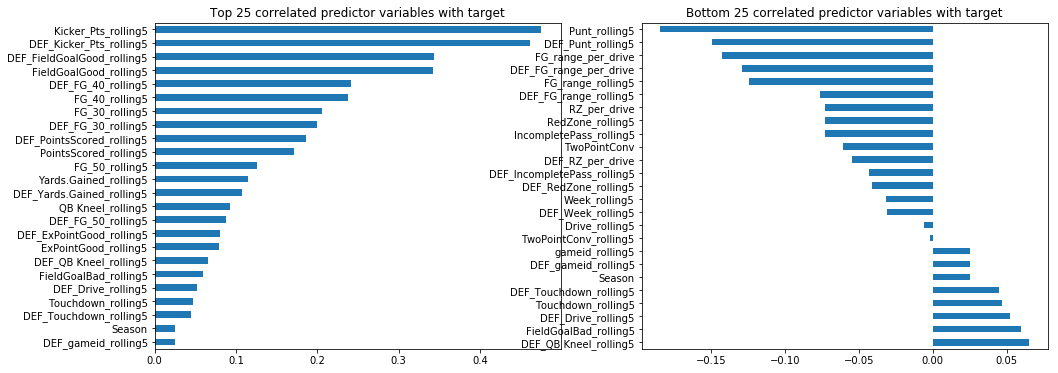

In [19]:

corr_df2 = pd.concat([X,y], axis=1)

corr = corr_df2.corr()['Kicker_Pts']

corr_rank = corr.sort_values(ascending=False)

corr_rank_high = corr_rank[1:25]
corr_rank_low = corr_rank[-25:]

plt.subplots(figsize=(16,6))

plt.subplot(1, 2, 1)
highCorrs = corr_rank_high.sort_values(ascending=True)
highCorrs.plot(kind='barh')
plt.title('Top 25 correlated predictor variables with target')

plt.subplot(1, 2, 2)
inverseCorrs = corr_rank_low.sort_values(ascending=False)
inverseCorrs.plot(kind='barh')
plt.title('Bottom 25 correlated predictor variables with target');

In [20]:
from sklearn.linear_model import ElasticNet, Lasso, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [21]:
train = X
y_train = y

In [22]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [23]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [24]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [25]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [26]:
GBoost.fit(train, y_train)

scores_GB = cross_val_score(GBoost, train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_GB.mean(), scores_GB.std() * 2))

Accuracy: 0.17 (+/- 0.19)


In [27]:
lasso.fit(train, y_train)

scores_lasso = cross_val_score(lasso, train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

Accuracy: 0.34 (+/- 0.05)


In [28]:
ENet.fit(train, y_train)

scores_ENet = cross_val_score(ENet, train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_ENet.mean(), scores_ENet.std() * 2))

Accuracy: 0.34 (+/- 0.05)


In [29]:
KRR.fit(train, y_train)

scores_KRR = cross_val_score(KRR, train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_KRR.mean(), scores_KRR.std() * 2))

Accuracy: 0.01 (+/- 0.02)
